In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe().round()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,30371831.0,14.0,19.0,92.0,655.0,0.0,0.0,0.0,0.0,0.0,...,16.0,26.0,107.0,881.0,0.0,0.0,0.0,0.0,0.0,0.0
std,125020586.0,4.0,4.0,24.0,352.0,0.0,0.0,0.0,0.0,0.0,...,5.0,6.0,34.0,569.0,0.0,0.0,0.0,0.0,0.0,0.0
min,8670.0,7.0,10.0,44.0,144.0,0.0,0.0,0.0,0.0,0.0,...,8.0,12.0,50.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,869218.0,12.0,16.0,75.0,420.0,0.0,0.0,0.0,0.0,0.0,...,13.0,21.0,84.0,515.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,906024.0,13.0,19.0,86.0,551.0,0.0,0.0,0.0,0.0,0.0,...,15.0,25.0,98.0,686.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,8813129.0,16.0,22.0,104.0,783.0,0.0,0.0,0.0,0.0,0.0,...,19.0,30.0,125.0,1084.0,0.0,0.0,0.0,0.0,0.0,0.0
max,911320502.0,28.0,39.0,188.0,2501.0,0.0,0.0,0.0,0.0,0.0,...,36.0,50.0,251.0,4254.0,0.0,1.0,1.0,0.0,1.0,0.0


In [6]:
df.shape

(569, 32)

In [7]:
df.diagnosis.nunique()

2

## EDA

In [8]:
df.columns = df.columns.str.replace(' ', '_')

In [9]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
df.diagnosis = (df.diagnosis =='M').astype('int')

## Feature Selection

In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

model = LogisticRegression()

rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst'],
      dtype='object')


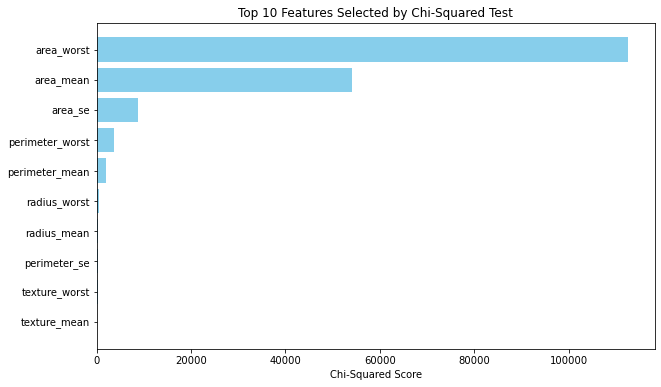

In [12]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2


X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']


selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)


feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})

top_features = feature_scores[selector.get_support()]
top_features = top_features.sort_values(by="Score", ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Score'], color='skyblue')
plt.xlabel("Chi-Squared Score")
plt.title("Top 10 Features Selected by Chi-Squared Test")
plt.gca().invert_yaxis()
plt.show()

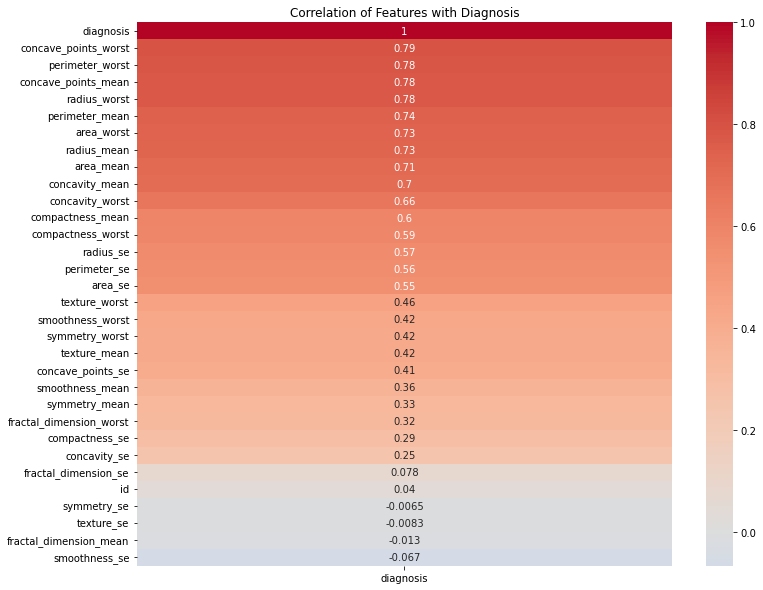

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['diagnosis']].sort_values(by='diagnosis', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of Features with Diagnosis")
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000, random_state=42), {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    "SVM": (SVC(), {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    }),
    "K-Nearest Neighbors": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    })
}

In [18]:
best_models = {}
best_scores = {}

for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    
    
    grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
  
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
   
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated score for {model_name}: {grid_search.best_score_:.4f}\n")

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validated score for Logistic Regression: 0.9812

Training Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validated score for Random Forest: 0.9601

Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best cross-validated score for Gradient Boosting: 0.9600

Training SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Best cross-validated score for SVM: 0.9765

Training K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validated score for K-Nearest Neighbors: 0.9718



In [19]:

best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]

print(f"Best model selected: {best_model_name}")

# Predict on the test set and evaluate
y_pred = best_model.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best model selected: Logistic Regression
Accuracy on test set: 0.9790209790209791
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.94      0.97        48

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix:
 [[95  0]
 [ 3 45]]


In [20]:
final_model = LogisticRegression(C=10, solver='liblinear', max_iter=1000, random_state=42)
final_model.fit(X_train_scaled, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [21]:
from sklearn.metrics import classification_report


y_train_pred = final_model.predict(X_train_scaled)
y_test_pred = final_model.predict(X_test_scaled)


print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       262
           1       0.99      0.98      0.99       164

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.96      0.96      0.96        48

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [31]:
import pickle

# Save the final model
with open('final_logistic_regression_model', 'wb') as file:
    pickle.dump(final_model, file)

print("Model saved as 'final_logistic_regression_model'")

Model saved as 'final_logistic_regression_model'


In [32]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


with open('scaler', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
print("Scaler saved as 'scaler'")

Scaler saved as 'scaler'


## Load Model

In [1]:
import pickle

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

In [3]:
import numpy as np

In [4]:
new_data = np.array([[15.5, 16.2, 120.5, 1000.0, 0.115, 0.230, 0.250, 0.160, 0.120,
                      0.127, 0.208, 132.0, 1030.0, 0.135, 0.260, 0.320, 0.250, 0.220,
                      0.190, 0.105, 0.460, 0.155, 0.205, 0.320, 0.480, 0.210, 0.210,
                      130.0, 118.0, 141.0]])

In [5]:
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

In [7]:
new_data_scaled = loaded_scaler.transform(new_data)

In [8]:
with open('final_logistic_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Predict
prediction = loaded_model.predict(new_data_scaled)
print("Prediction:", prediction)

Prediction: [1]


In [9]:
loaded_model

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')